# Heterocedasticidade, Erros-Padrão Robustos, Estimadores Alternativos ao OLS, e Autocorreção

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Heterocedasticidade
  * Avaliação Gráfica
  * Avaliação Formal
    * Teste de Breusch-Pagan-Godfrey
    * Teste de White
* Erros-Padrão Robustos
    * Erros-Padrão Robusto de White
    * Erros-Padrão Bootstrap
    * Erros-Padrão Wild Bootstrap
* Estimadores Alternativos ao OLS
    * Estimador GLS - Generalized Least-Squares 
    * Estimador FGLS - Feasible Generalized Least-Squares
    * Estimador WLS - Weighted Least-Squares
* Autocorrelação

### Referências

* HAYASHI , F. Econometrics, Princeton university press, 2000.
* Greene, W. H. Econometric Analysis. New Jersey. Prentice Hall; 5th edition. (2002).
* Gujarati, D. N. Econometria Básica. 5ª ed. Rio de Janeiro: Elsevier, 2011.
* Wooldridge, J.M. 2002. Econometric Analysis of Cross Section and Panel Data. Cambridge, MA: MIT Press, pp.282-283.
* Wooldridge, J. M. Introdução à Econometria: uma abordagem moderna. São Paulo: Cengage Learning, 2015.
* Pereda, P. C., & Alves, D. Econometria Aplicada, Elsevier, 2018.
* NOTAS PRÓPRIAS



## Heterocedasticidade

A heterocedasticidade é a violação da hipótese de variância esférica do erro. Em outras palavras, a variância do erro não é constante.

$$ E(\epsilon \epsilon^{´}|X) = \begin{bmatrix} \sigma_{1}^{2} & 0 & 0 & ... & 0 \\ 0 & \sigma_{2}^{2} & 0 & ... & 0 \\ 0 & 0 & \sigma_{3}^{2} & ... & 0 \\ ... & ... & ... & ... & ... \\ 0 & 0 & 0 & ... & \sigma_{n}^{2} \end{bmatrix} = \Omega $$

A presença de heterocedasticidade gera estimadores OLS **não viesados**, mas **ineficientes**. Isso ocorre porque a variância dos coeficientes estimados é calculada sob a hipótese de homocedasticidade. Se a variância do erro não é constante, a variância dos coeficientes estimados é calculada incorretamente. Ou seja, a **variância dos parâmetros é viesada**, gerando **erros-padrão** e **intervalos de confiança** incorretos.

**Como sabemos se o modelo econométrico tem heterocedasticidade?**

Podemos utilizar avaliação gráfica (Visual) ou testes estatísticos.

### Avaliação Gráfica

A avaliação gráfica é feita por meio de gráficos de resíduos. Se a variância dos resíduos aumenta ou diminui com o aumento dos valores ajustados, temos um indício de heterocedasticidade. Vamos fazer um exemplo prático.

In [11]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.diagnostic import het_white
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

In [6]:
# Ajustando as variáveis
# Criar a variável de resultado
df['Y'] = df['bweight']
# Crie a variável 'Treated' com valor inicial de 0
df['Treated'] = 0
# Recodifique 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df.loc[df['mbsmoke'] == 'smoker', 'Treated'] = 1

In [7]:
# Regressão linear
reg2 = smf.ols("Y ~ Treated + medu", data=df).fit()

In [8]:
df['y_pred'] = reg2.predict()
df['resid'] = reg2.resid

In [9]:
# Criando a variável resid2 (resíduo ao quadrado) no DataFrame df
df['resid2']= df['resid']**2

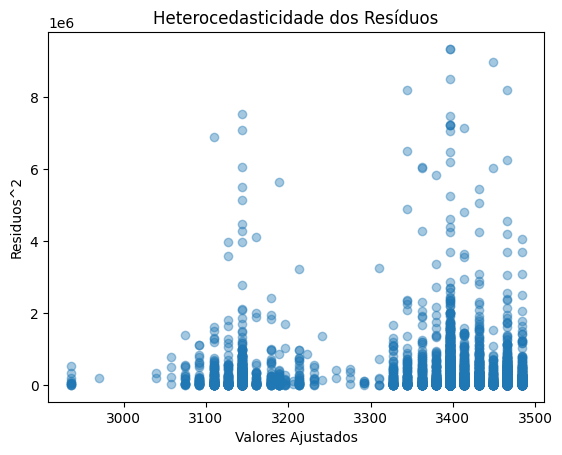

In [12]:
# Plotar gráfico de dispersão dos resíduos ao quadrado em relação aos valores ajustados
plt.scatter(df['y_pred'],df['resid2'], alpha=0.4)
plt.title("Heterocedasticidade dos Resíduos")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos^2")
plt.show()


### Métodos Formais

* **Teste de heterocedasticidade de Breusch-Pagan**

$$ H_{0}: \sigma_{i}^{2} = \sigma^{2} \quad \text{Homocedasticidade} $$
$$ H_{1}: \sigma_{i}^{2} \neq \sigma^{2} \quad \text{Heterocedasticidade} $$

O teste de Breusch-Pagan é uma forma de testar a hipótese nula de homocedasticidade nos erros de regressão, ou seja, de que a variância dos erros é constante. A estatística do teste é calculada em quatro etapas:

**Passo 1:** Ajuste um modelo de regressão linear aos seus dados utilizando o método dos mínimos quadrados ordinários (OLS):

$$ y_i = X_i \beta + \varepsilon_i, \quad i = 1, \ldots, n $$

Onde:
- $ y_i $ são os valores observados da variável dependente.
- $ X_i $ são os valores observados das variáveis independentes.
- $ \beta $ são os coeficientes do modelo.
- $ \varepsilon_i $ são os erros de regressão.

**Passo 2:** Calcule os resíduos da regressão $ \hat{\varepsilon}_i $, eleve-os ao quadrado e divida pelo estimador da variância dos erros obtido no Passo 1 para obter $ g_i $:

$$ g_i = \frac{\hat{\varepsilon}_i^2}{\hat{\sigma}^2}, \quad \hat{\sigma}^2 = \frac{1}{n} \sum \hat{\varepsilon}_i^2 $$

**Passo 3:** Estime uma regressão auxiliar onde $ g_i $ é regredido sobre uma constante e, possivelmente, outras variáveis explicativas, como:

$$ g_i = \gamma_1 + \gamma_2 z_{2i} + \ldots + \gamma_p z_{pi} + \eta_i $$

Onde $ z_{2i} $, $ z_{3i} $, ..., $ z_{pi} $ podem ser os mesmos preditores originais do modelo ou outras variáveis que você deseja incluir.

**Passo 4:** A estatística do teste de Breusch-Pagan ($ BP $) é dada por:

$$ BP = \frac{1}{2} \sum_{i=1}^n \hat{\eta}_i^2 $$

Onde $ \hat{\eta}_i $ são os resíduos da regressão auxiliar do Passo 3. No entanto, uma forma alternativa, equivalente sob a hipótese nula, é expressar o $ BP $ em termos da soma dos quadrados totais ($ \text{TSS} $) e da soma dos quadrados dos resíduos ($ \text{RSS} $) da regressão auxiliar:

$$ BP = \frac{1}{2} (\text{TSS} - \text{RSS}) $$

- **TSS (Total Sum of Squares)**: A soma dos quadrados dos desvios de $ g_i $ em relação à média.
- **RSS (Residual Sum of Squares)**: A soma dos quadrados dos resíduos da regressão auxiliar.

Esta estatística de teste segue uma distribuição qui-quadrado com $ p - 1 $ graus de liberdade sob a hipótese nula de homocedasticidade, onde $ p $ é o número de variáveis explicativas na regressão auxiliar.


In [13]:
import statsmodels.stats.diagnostic as smd

# Realizar o teste Breusch-Pagan-Godfrey
bp_teste = smd.het_breuschpagan(reg2.resid, reg2.model.exog)

# Imprimir o resultado do teste
print("Estatística do teste:", bp_teste[0])
print("Valor-p:", bp_teste[1])


Estatística do teste: 2.3665278182721146
Valor-p: 0.30627744367563037


Com base nos resultados do teste Breusch-Pagan-Godfrey, não há evidências suficientes para concluir que há heterocedasticidade nos erros de regressão.

Vejamos outra estatística de teste importante.

### Teste de Heterocedasticidade de White

$$ H_{0}: \sigma_{i}^{2} = \sigma^{2} \quad \text{Homocedasticidade} $$
$$ H_{1}: \sigma_{i}^{2} \neq \sigma^{2} \quad \text{Heterocedasticidade} $$

O Teste de White é utilizado para verificar a presença de heterocedasticidade nos resíduos de um modelo de regressão. Em outras palavras, ele testa a hipótese nula de que a variância dos erros é constante (homocedasticidade). A rejeição dessa hipótese indica que a variância dos erros varia, ou seja, há heterocedasticidade.

Os passos para realizar o Teste de White são os seguintes:

1. **Ajuste do Modelo de Regressão**:
   Primeiramente, ajuste um modelo de regressão linear aos dados utilizando o método dos mínimos quadrados ordinários (OLS).

2. **Cálculo dos Resíduos**:
   Calcule os resíduos do modelo ajustado, ou seja, as diferenças entre os valores observados e os valores preditos pelo modelo.

3. **Regressão Auxiliar**:
   Estime uma regressão onde os quadrados dos resíduos ($ \hat{\varepsilon}_i^2 $) são regredidos sobre as variáveis independentes originais, seus quadrados e suas interações. Essa abordagem permite capturar diferentes formas de heterocedasticidade, que podem surgir de relações não lineares ou de interações entre as variáveis independentes.

   A forma geral da regressão auxiliar é:

   $$ \hat{\varepsilon}_i^2 = \alpha_0 + \alpha_1 X_{1i} + \alpha_2 X_{2i} + \alpha_3 X_{1i}^2 + \alpha_4 X_{2i}^2 + \alpha_5 (X_{1i} \cdot X_{2i}) + \dots + u_i $$

   Onde:
   - $ \hat{\varepsilon}_i^2 $ são os quadrados dos resíduos do modelo original.
   - As variáveis independentes na regressão auxiliar incluem as variáveis originais, seus quadrados e suas interações.

4. **Teste da Significância dos Coeficientes**:
   Verifique a significância dos coeficientes estimados na regressão auxiliar. A hipótese nula do teste é que todos os coeficientes associados às variáveis explicativas (exceto a constante) são iguais a zero, o que indicaria homocedasticidade.

**Estatística de Teste**:

A estatística do teste de White é dada por:

$$ LM = nR^{2} $$

Onde:
- $ n $ é o número de observações.
- $ R^{2} $ é o coeficiente de determinação da regressão auxiliar.

Esta estatística segue uma distribuição qui-quadrado com graus de liberdade iguais ao número de parâmetros explicativos na regressão auxiliar menos um.

**Interpretação do Resultado**:

- **Se a estatística de teste for significativa**: Isso sugere a rejeição da hipótese nula de homocedasticidade, indicando que há evidências de heterocedasticidade nos erros do modelo.
- **Se a estatística de teste não for significativa**: Não há evidências suficientes para rejeitar a hipótese nula, indicando que a homocedasticidade não pode ser descartada.


In [14]:
# Realizar o teste de White
white_teste = smd.het_white(reg2.resid, reg2.model.exog)

# Imprimir o resultado do teste
print("Estatística do teste:", white_teste[0])
print("Valor-p:", white_teste[1])

Estatística do teste: 6.988109631395089
Valor-p: 0.13651791268854713


A estatística do teste de White é aproximadamente 6.9881 e o valor-p associado é aproximadamente 0.1365. Isso significa que, com um nível de significância de 0.05, como o valor-p é maior que 0.05, não há evidências suficientes para rejeitar **a hipótese nula de homocedasticidade** nos resíduos do modelo de regressão. Portanto, podemos concluir que não há heterocedasticidade significativa nos resíduos do modelo.

**Quais as consequências da heterocedasticidade?**

Os estimadores de mínimos quadrados ordinários (MQO) não são eficientes na presença de heterocedasticidade, o que pode resultar em intervalos de confiança e testes de hipóteses inválidos. A presença de heterocedasticidade pode comprometer a qualidade das inferências obtidas a partir de um modelo de regressão, levando a conclusões errôneas e imprecisas. Portanto, é importante diagnosticar e corrigir a heterocedasticidade, quando presente, para garantir que as estimativas do modelo sejam confiáveis e precisas.

### Erros-Padrão Robustos de White

Quando há suspeita de heterocedasticidade nos resíduos de uma regressão, os erros-padrão calculados pela matriz de covariância padrão podem ser subestimados, levando a inferências estatísticas incorretas. Para lidar com esse problema, **Halbert White (1980)** propôs uma abordagem robusta que não exige suposições específicas sobre a forma da heterocedasticidade. Esta abordagem resulta em estimativas de variância-covariância mais confiáveis para os coeficientes de regressão, mesmo na presença de heterocedasticidade. Esses erros-padrão ajustados são conhecidos como "Erros-Padrão Robustos de White".

A ideia central é substituir os erros não observados por uma matriz diagonal contendo os quadrados dos resíduos ajustados na diagonal. A matriz de variância-covariância robusta é então usada para calcular os erros-padrão dos coeficientes de regressão, tornando-os mais resistentes a problemas de heterocedasticidade.

A matriz de variância-covariância robusta aos erros pode ser expressa da seguinte forma:

$$ V_{robust}(b|X) = \left( X'X \right)^{-1} X' \text{diag}(\hat{u}_i^2) X \left( X'X \right)^{-1} $$

Onde:
- $ X $ é a matriz de design das variáveis independentes.
- $ X' $ é a transposta de $ X $.
- $ \hat{u}_i^2 $ são os quadrados dos resíduos da regressão, e $ \text{diag}(\hat{u}_i^2) $ representa uma matriz diagonal cujos elementos principais são \( \hat{u}_i^2 \).

**Benefícios do Uso dos Erros-Padrão Robustos de White**:

- **Estimativas mais confiáveis dos coeficientes de regressão**: Os erros-padrão robustos fornecem intervalos de confiança mais precisos e testes de hipóteses mais robustos na presença de heterocedasticidade.
- **Maior robustez a outliers**: Métodos robustos, como Huber-White e MacKinnon-White, são menos sensíveis à presença de outliers nos dados.
- **Testes de hipóteses mais confiáveis**: Utilizando erros-padrão robustos, os testes de hipóteses tornam-se mais confiáveis, mesmo quando a heterocedasticidade está presente.

**Métodos para Calcular Erros-Padrão Robustos de White**:

Existem várias abordagens para calcular os erros-padrão robustos de White, cada uma com características específicas. Alguns dos métodos mais comuns incluem:

- **HC0 (White, 1980)**: O método original de White, que utiliza diretamente os resíduos quadráticos. É o método mais simples, mas pode ser menos eficiente em amostras pequenas.
- **HC1 (Huber-White, 1962)**: Uma variante que ajusta os resíduos para reduzir o impacto de outliers, tornando-se mais eficiente que o HC0 e menos sensível a valores atípicos.
- **HC2 (MacKinnon-White, 1988)**: Um método que aplica um ajuste adicional para aumentar a eficiência em amostras maiores. Ele melhora a robustez sem sacrificar a eficiência em comparação com o HC1.
- **HC3 (Cribari-Neto, 2004)**: Uma variante que faz um ajuste mais forte para diferentes tipos de heterocedasticidade, sendo a opção mais robusta entre os métodos HC, embora possa ser menos eficiente em algumas situações.

**Escolhendo o Tipo de Matriz de Covariância**:

A escolha do método de matriz de covariância robusta depende de vários fatores:

- **Tamanho da amostra**: Em amostras pequenas, HC1 ou HC2 tendem a ser mais eficientes que HC0.
- **Presença de outliers**: Se há suspeita de outliers, HC1 ou HC3 podem ser mais robustos.
- **Distribuição dos erros**: Se a distribuição dos erros não for normal, o método HC3 pode ser mais apropriado.

Em geral, **HC1** e **HC2** são boas escolhas para a maioria dos casos, equilibrando robustez e eficiência. O **HC3** pode ser preferido em situações com outliers ou distribuições não normais, mas pode ser menos eficiente em amostras menores.


In [15]:
# Regressão linear robusta à Heterocedasticidade
reg_robust1 = smf.ols("Y ~ Treated + mage", data=df).fit(cov_type='HC3')

# Imprima os resultados da regressão
print(reg_robust1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           6.54e-45
Time:                        15:24:20   Log-Likelihood:                -36016.
No. Observations:                4642   AIC:                         7.204e+04
Df Residuals:                    4639   BIC:                         7.206e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3177.1242     43.801     72.535      0.0

### Erros-Padrão Bootstrap

**Conceito**

A técnica do bootstrap utiliza *resampling* (reamostragem) para estimar a distribuição dos coeficientes de regressão. Através da criação de múltiplas amostras "resampleadas" (reamostragens com reposição) do conjunto de dados original, o *bootstrap* estima a variabilidade dos coeficientes e **gera erros-padrão robustos à heterocedasticidade** e à **não normalidade dos erros**.

Vantagens:

* **Flexibilidade**: O bootstrap se adapta a diferentes tipos de modelos, incluindo modelos lineares e não lineares, com heterocedasticidade e dependência serial.
* **Robustez**: A técnica é menos sensível à violação de suposições como homocedasticidade e normalidade dos erros.
* **Interpretação intuitiva**: Os erros-padrão bootstrap fornecem uma estimativa direta da variabilidade dos coeficientes de regressão, facilitando a interpretação.

Desvantagens:

* **Computacionalmente intensivo**: O processo de resampling pode ser computacionalmente exigente, especialmente para grandes conjuntos de dados.
* **Escolhas do método**: A escolha do tamanho do resample e do método de resampling (por exemplo, bootstrap paramétrico ou bootstrap não paramétrico) pode afetar os resultados.
* **Menos preciso em amostras pequenas**: A precisão do bootstrap pode ser menor em amostras pequenas, exigindo cuidado na interpretação dos resultados.

**Procedimento Bootstrap**

  * **Reamostragem Bootstrap:**
    - Gere $ B $ amostras bootstrap a partir dos dados originais.
    - Para cada amostra bootstrap, ajuste um modelo de regressão linear e obtenha os coeficientes $ \hat{\beta}^*_b $.

Vejamos a imagem do livro "Econometria Aplicada" de Pereda e Alves (2021).

<div style="text-align:center;">
    <img src="images/bootstrapping2.jpg"  alt="Imagem" style="width: 800px;"/>
</div>




* **Construção da Distribuição dos Coeficientes Bootstrap:**

  - Colete todas as estimativas dos coeficientes das amostras bootstrap $ \hat{\beta}^*_1, \hat{\beta}^*_2, \ldots, \hat{\beta}^*_B $.

* **Cálculo dos Erros-Padrão Bootstrap:**

  - Calcule o erro-padrão bootstrap ($ \text{SE}_\text{bootstrap} $) para cada coeficiente como o desvio padrão das estimativas bootstrap dos coeficientes. A fórmula para o erro-padrão bootstrap para um coeficiente específico $ \beta_j $ é:

$$
\text{SE}_\text{bootstrap}(\beta_j) = \sqrt{\frac{1}{B-1} \sum_{b=1}^{B} \left( \hat{\beta}^*_{j,b} - \bar{\beta}^*_j \right)^2}
$$

onde 

$$
\bar{\beta}^*_j = \frac{1}{B} \sum_{b=1}^{B} \hat{\beta}^*_{j,b}
$$

é a média das estimativas bootstrap para o coeficiente $ \beta_j$.

Exemplo de aplicação do bootstrap em Python:

In [16]:
import statsmodels.api as sm
import numpy as np
from scipy import stats

# Selecione as variáveis ​​de interesse
y = df['Y']
X = df[['Treated', 'mage']]
# adicionar a constante em X
X = sm.add_constant(X)

In [17]:
# Utilize a biblioteca statsmodels para ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

In [18]:
# Definir o número de iterações de bootstrap
B = 500

# Inicializar listas para armazenar os coeficientes e erros-padrão bootstrap
beta_bootstrap = []
se_bootstrap = []

# Realizar o bootstrap
for i in range(B):
    # Gerar índices para reamostragem com reposição
    indices = np.random.choice(len(y), size=len(y), replace=True)

    # Obter dados resampleados
    y_bootstrap = y[indices]
    X_bootstrap = X.iloc[indices]

    # Ajustar o modelo de regressão nos dados resampleados
    model_bootstrap = sm.OLS(y_bootstrap, X_bootstrap).fit()

    # Armazenar os coeficientes e erros-padrão bootstrap
    beta_bootstrap.append(model_bootstrap.params)
    se_bootstrap.append(model_bootstrap.bse)

# Converter as listas em arrays NumPy
beta_bootstrap = np.array(beta_bootstrap)
se_bootstrap = np.array(se_bootstrap)

In [19]:
# Calcular as médias bootstrap dos coeficientes
beta_barra_bootstrap = np.mean(beta_bootstrap, axis=0)

# Calcular o standard deviation bootstrap
se_barra_bootstrap = np.std(beta_bootstrap, axis=0)

In [20]:
# Calcular t-statistic
t = beta_barra_bootstrap / se_barra_bootstrap

# Calcular p-value (two-tailed t-distribution)
df = model.df_resid # n-k graus de liberdade
p = 2 * stats.t.sf(np.abs(t), df=df) 

# Create the results table
results_table = pd.DataFrame({
    "Coefficient": model.params,
    "Bootstrap SE": se_barra_bootstrap,
    "t-statistic": t,
    "p-value": p
})

# Display the table
print(results_table.to_string())

         Coefficient  Bootstrap SE  t-statistic       p-value
const    3177.124236     43.762883    72.549904  0.000000e+00
Treated  -260.795182     21.708887   -11.968033  1.567462e-32
mage        8.794596      1.584502     5.598929  2.281136e-08


### Erro-Padrão Wild-Bootstrap

**Conceito**

O Wild Bootstrap é uma técnica de reamostragem particularmente útil quando os erros de um modelo de regressão apresentam heterocedasticidade, ou seja, quando a variância dos erros não é constante. Diferentemente do bootstrap padrão, que reamostra observações inteiras, o Wild Bootstrap ajusta a magnitude dos erros para cada observação individualmente, aplicando um fator de perturbação aleatória. Esse método é vantajoso em situações de heterocedasticidade, pois oferece uma estimativa mais robusta dos erros-padrão dos coeficientes de regressão.

**Vantagens:**

- **Robustez à heterocedasticidade**: O Wild Bootstrap é especificamente projetado para lidar com a heterocedasticidade nos dados, oferecendo estimativas de erros-padrão mais confiáveis nessas situações.
- **Adequação para amostras pequenas**: Em amostras pequenas, o Wild Bootstrap pode ser mais eficaz do que métodos tradicionais de correção, pois ajusta individualmente os resíduos, capturando melhor a variabilidade.

**Desvantagens:**

- **Complexidade**: A implementação do Wild Bootstrap é mais complexa em comparação com o bootstrap padrão, exigindo cuidado adicional na execução.
- **Dependência do método de reamostragem**: Os resultados podem variar dependendo da escolha do esquema de reamostragem (por exemplo, distribuição de Rademacher ou N(0,1)), o que requer atenção na análise dos resultados.

**Procedimento Wild Bootstrap**

1. **Ajuste do Modelo Inicial:**
   - Estime o modelo de regressão linear nos dados originais para obter os resíduos originais (\( \hat{u}_i \)).

2. **Geração de Erros Wild Bootstrap:**
   - Para cada observação \( i \), gere um fator de perturbação aleatória \( \varepsilon_i^* \), utilizando uma distribuição específica (como N(0,1) ou Rademacher).
   - Calcule os resíduos bootstrap \( u_i^* = \varepsilon_i^* \cdot \hat{u}_i \), ajustando assim os resíduos originais.

3. **Reamostragem Wild Bootstrap:**
   - Use os resíduos ajustados \( u_i^* \) para gerar novas variáveis dependentes \( y_i^* = X_i \hat{\beta} + u_i^* \) e ajuste o modelo de regressão para cada amostra bootstrap.

4. **Cálculo dos Erros-Padrão Wild Bootstrap:**
   - Calcule os erros-padrão dos coeficientes de regressão a partir das estimativas obtidas nas amostras bootstrap.



In [21]:
# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

In [22]:
# Número de reamostragens bootstrap
B = 1000

# Obter os resíduos originais
residuals = model.resid

# Inicializar listas para armazenar os coeficientes bootstrap
beta_wild_bootstrap = []

for i in range(B):
    # Gerar perturbações wild bootstrap
    perturbations = np.random.choice([-1, 1], size=len(y), replace=True)
    # Calcular novos resíduos bootstrap
    residuals_bootstrap = residuals * perturbations
    # Gerar nova variável dependente bootstrap
    y_bootstrap = model.predict(X) + residuals_bootstrap
    # Ajustar o modelo nos dados bootstrap
    model_bootstrap = sm.OLS(y_bootstrap, X).fit()
    # Armazenar os coeficientes bootstrap
    beta_wild_bootstrap.append(model_bootstrap.params)

# Converter para array NumPy
beta_wild_bootstrap = np.array(beta_wild_bootstrap)

# Calcular as médias bootstrap dos coeficientes
beta_barra_wild_bootstrap = np.mean(beta_wild_bootstrap, axis=0)

# Calcular o erro-padrão bootstrap
se_wild_bootstrap = np.std(beta_wild_bootstrap, axis=0)

# Calcular t-statistic e p-value
t = beta_barra_wild_bootstrap / se_wild_bootstrap
df = model.df_resid
p = 2 * stats.t.sf(np.abs(t), df=df) 

# Criar a tabela de resultados
results_table_wild = pd.DataFrame({
    "Coefficient": model.params,
    "Wild Bootstrap SE": se_wild_bootstrap,
    "t-statistic": t,
    "p-value": p
})

# Exibir a tabela
print(results_table_wild.to_string())


         Coefficient  Wild Bootstrap SE  t-statistic       p-value
const    3177.124236          42.539604    74.678394  0.000000e+00
Treated  -260.795182          21.107393   -12.364467  1.418390e-34
mage        8.794596           1.550294     5.686062  1.379722e-08


### Estimadores Alternativos ao OLS


Lembre-se que pelo teorema de Gauss-Markov, o estimador OLS é eficiente entre os estimadores não viesados se os erros da regressão linear são independentes e homocedásticos.
Assumimos agora que a matriz de variância é $\Omega \neq \sigma^{2} 𝐼_{𝑛}$. Logo, estimadores alternativos ao OLS são necessários para obteção de estimadores eficientes.

**Estimadores alternativos:**
* Estimador GLS - Generalized Least-Squares 
* Estimador FGLS - Feasible Generalized Least-Squares
* Estimador WLS - Weighted Least-Squares


#### Estimador GLS - Generalized Least-Squares 

O estimador de mínimos quadrados generalizados (GLS) é uma extensão do método de mínimos quadrados ordinários (OLS) que leva em consideração a estrutura de correlação dos erros de regressão. O GLS é utilizado quando os erros de regressão não são independentes e possuem uma estrutura de correlação específica, como a heterocedasticidade e a dependência serial.

Se $ \Omega $ é conhecida e não singular, podemos pré-multiplicar o modelo por $ \Omega^{-1/2} $, então:

$$ \Omega^{-1/2} y = \Omega^{-1/2} X\beta + \Omega^{-1/2} u $$

$$ \text{Var}(\Omega^{-1/2} u) = E\left[(\Omega^{-1/2} u - (0))^2\right] = \Omega^{-1} E[u^2] = \Omega^{-1}.\Omega^1 = 1 $$

$$ \hat{\beta}_{GLS} = \left( X^{\prime} \Omega^{-1} X \right)^{-1} X^{\prime} \Omega^{-1} y $$


Entretanto, o GLS não é calculado na prática, porque não conhecemos o "verdadeiro" valor de $ \Omega $.

#### Estimador FGLS - Feasible Generalized Least-Squares

Na prática não conhecemos $\Omega $. Então especifica-se que $\Omega = \Omega(\gamma) $, onde $\gamma $ é um vetor de parâmetros de dimensão finita, obtendo uma estimativa consistente $ \hat{\gamma} $ de $ \gamma $, formando $ \hat{\Omega} = \Omega(\hat{\gamma}) $. Se os erros são heterocedásticos, então especifica-se $ V[u|X] = \exp(z^{\prime}\gamma) $, onde $ z $ é um subconjunto de $ x $, e a função exponencial é usada para garantir uma variância positiva. 

Então, $ \hat{\gamma} $ pode ser consistentemente estimado por uma regressão de mínimos quadrados não lineares do quadrado dos resíduos OLS: $ \hat{u}_i^2 = (y - x^{\prime}\hat{\beta}_{OLS})^2 $ sobre $ \exp(z^{\prime}\gamma) $. Essa estimativa de $ \hat{\Omega} $ pode ser usada no lugar de $ \Omega $.

$$ \hat{\beta}_{FGLS} = \left( X^{\prime} \hat{\Omega}^{-1} X \right)^{-1} X^{\prime} \hat{\Omega}^{-1} y $$

É importante notar que não podemos utilizar $ Var(u) = Diag[\hat{u}_i^2] $ que foi utilizada para o cálculo de erro padrão robusto porque gera estimação inconsistente (não incorpora as covariâncias espaciais).


In [22]:
# Regressão FGLS
reg_GLS = sm.GLS(y, X, data=df).fit()

# Imprima os resultados da regressão
print(reg_GLS.summary())


                            GLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.041
Model:                            GLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     100.3
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           2.22e-43
Time:                        17:42:01   Log-Likelihood:                -36016.
No. Observations:                4642   AIC:                         7.204e+04
Df Residuals:                    4639   BIC:                         7.206e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3177.1242     41.009     77.473      0.0

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


### Estimador WLS - Weighted Least-Squares

O estimador de mínimos quadrados ponderados (WLS) é um caso especial do estimador de mínimos quadrados generalizados viável (FGLS), onde a matriz de variância-covariância $ \Omega^{-1} $ é diagonal. Essa diagonalização implica que os erros de cada observação são independentes uns dos outros, mas com variâncias potencialmente diferentes, ou seja, cada erro tem uma variância diferente, mas sem correlação entre os erros de diferentes observações.

O WLS é utilizado em situações onde há heterocedasticidade conhecida ou suspeita nos dados, e o pesquisador deseja dar pesos diferentes a cada observação com base em uma função que reflete a variabilidade dos erros. Isso torna o WLS uma técnica valiosa para lidar com variâncias não constantes nos resíduos, garantindo estimativas mais eficientes dos coeficientes de regressão.

A fórmula do estimador WLS é dada por:

$$ \hat{\beta}_{WLS} = \left( X^{\prime} \hat{\Omega}^{-1} X \right)^{-1} X^{\prime} \hat{\Omega}^{-1} y $$

Aqui, $ \hat{\Omega}^{-1} $ é uma matriz diagonal, onde cada elemento na diagonal representa o peso atribuído à respectiva observação. Esses pesos são normalmente escolhidos como inversos da variância dos erros de cada observação, de forma que observações com menor variância tenham maior peso na estimação.

#### Considerações sobre a Matriz de Variância de Trabalho (Working Variance Matrix)

No WLS, não se assume que a matriz de variância $ \Omega^{-1} $ seja a verdadeira matriz de variância $ \Sigma^{-1} $. Em vez disso, o pesquisador utiliza uma matriz de variância de trabalho (working variance matrix) $ \hat{\Omega}^{-1} $, que é uma aproximação baseada em uma função dos erros que depende das variáveis explicativas $ X $.

Por exemplo, se assumirmos que os erros podem ser modelados como $ u = \sqrt{|x|} \varepsilon $, onde $ \varepsilon $ é um erro homocedástico com variância constante $ \sigma^2 $, então a variância dos erros $ u $ é dada por:

$$ V[u] = \sigma^2 |x| $$

Para estabilizar a variância dos erros, podemos dividir tanto a variável dependente $ y $ quanto as variáveis explicativas $ X $ pela raiz quadrada de $ |x| $, obtendo:

$$ y^* = \frac{y}{\sqrt{|x|}}, \quad X^* = \frac{X}{\sqrt{|x|}} $$

Ao aplicar o WLS, o modelo ajustado para essas variáveis transformadas é:

$$ y^* = X^* \beta + u^* $$

Onde $ u^* $ agora tem uma variância constante. A estimação $ \hat{\beta}_{WLS} $ se torna mais eficiente, pois leva em conta a heterocedasticidade modelada através dos pesos $ \sqrt{|x|} $.

#### Exemplo de Aplicação Prática do WLS

Suponha que você esteja analisando a relação entre o salário de trabalhadores e seus anos de experiência. Em muitos casos, a variabilidade do salário pode aumentar à medida que a experiência aumenta (heterocedasticidade). Se os resíduos $ u $ estiverem relacionados à experiência $ x $ de tal forma que $ V[u] = \sigma^2 x $, então um modelo WLS seria adequado.

Transformando o modelo original, dividimos $ y $ e $ X $ por $ \sqrt{x} $ e aplicamos OLS às variáveis transformadas. Isso resulta em estimativas de $ \beta $ que são mais precisas e confiáveis do que aquelas obtidas pelo OLS em presença de heterocedasticidade.

#### Vantagens e Limitações do WLS

**Vantagens:**
- **Eficiência Melhorada**: O WLS é mais eficiente que o OLS em presença de heterocedasticidade conhecida, pois pondera as observações de acordo com a variância dos erros.
- **Flexibilidade**: Permite que o pesquisador modele a heterocedasticidade de forma flexível, ajustando os pesos de acordo com uma função específica das variáveis explicativas.

**Limitações:**
- **Necessidade de Conhecimento Prévio**: O sucesso do WLS depende de uma boa especificação da matriz de variância de trabalho \( \hat{\Omega} \). Se a forma funcional da heterocedasticidade não for bem compreendida, o WLS pode não fornecer estimativas adequadas.
- **Complexidade Computacional**: O WLS pode ser mais complexo de implementar em comparação ao OLS, especialmente em grandes amostras ou quando a função de variância não é trivial.


In [23]:
# Regressão ponderada - WLS
# utilizando o inverso do quadrado dos resíduos do modelo como peso para a regressão
weights = 1 / np.square(np.abs(model.resid))

# Regressão linear ponderada
reg_WLS = sm.WLS(y, X, weights=weights).fit()

# Imprimir os resultados da regressão
print(reg_WLS.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.139e+05
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:36:02   Log-Likelihood:                -32543.
No. Observations:                4642   AIC:                         6.509e+04
Df Residuals:                    4639   BIC:                         6.511e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3176.1765      0.408   7793.131      0.0

## Autocorrelação

Os dados econométricos podem ser classificados em três tipos principais, cada um com características específicas que influenciam as propriedades estatísticas e econométricas dos modelos:

* **Corte Transversal**: Observações coletadas em um único ponto no tempo para várias unidades (como domicílios ou empresas). Estes dados são frequentemente afetados por heterocedasticidade, mas geralmente não apresentam autocorrelação temporal, exceto em contextos de autocorrelação espacial.

* **Séries Temporais**: Observações ordenadas no tempo para uma única unidade. A autocorrelação é uma característica comum, dado que observações subsequentes no tempo podem ser influenciadas por observações passadas.

* **Dados em Painel (Longitudinais/Combinados)**: Combinação de dados de corte transversal e séries temporais, onde várias unidades são observadas ao longo do tempo. A autocorrelação pode ocorrer tanto nas dimensões temporal quanto espacial.

Para o problema da autocorrelação, **a dimensão temporal dos dados é fundamental**. A autocorrelação surge ao **relaxarmos a hipótese de variância esférica do termo de erro**, ou seja, a variância do termo de erro não é constante. Basicamente, teremos:

* **Autocorrelação Espacial**: Correlação entre observações no espaço.
* **Autocorrelação Serial (ou Temporal)**: Correlação entre observações em diferentes períodos de tempo.
  * Entre a variável e sua defasagem (lag)
  * Entre duas variáveis temporais diferentes

Em modelos de séries temporais, a autocorrelação dos resíduos viola a suposição de que os erros são independentes ao longo do tempo, resultando em inferências potencialmente enviesadas e inconsistentes (endogeneidade).

Considere o modelo de regressão linear simples:

$$
y_t = \alpha + \beta x_t + u_t,
$$

onde $ u_t $ representa o termo de erro que pode ser autocorrelacionado. Um modelo comum para capturar a estrutura da autocorrelação serial dos erros é o modelo autoregressivo de ordem 1 (AR(1)):

$$
u_t = \rho u_{t-1} + \epsilon_t,
$$

onde:

- $\rho$ é o coeficiente de autocorrelação de primeira ordem, com $-1 < \rho < 1$.
- $\epsilon_t$ é um termo de ruído branco, ou seja, $\epsilon_t \sim \text{i.i.d. } (0, \sigma^2)$.

O coeficiente de autocorrelação de ordem $ k $ é definido como:

$$
\rho_k = \frac{\text{Cov}(u_t, u_{t-k})}{\sqrt{\text{Var}(u_t) \cdot \text{Var}(u_{t-k})}},
$$

onde $\rho_k$ mede o grau de correlação entre $u_t$ e $u_{t-k}$.


A autocorrelação serial pode surgir de várias fontes, incluindo:

- **Omissão de Variáveis Relevantes**: Variáveis omitidas que exibem padrões temporais podem induzir autocorrelação nos erros.
  
- **Especificação Incorreta da Forma Funcional**: Modelos mal especificados, que não capturam a verdadeira relação entre as variáveis, podem resultar em resíduos autocorrelacionados.

- **Modelos Dinâmicos**: Inclusão de variáveis defasadas de forma inadequada pode introduzir dependência temporal nos erros.

- **Efeitos de Sazonalidade e Ciclos**: Fatores sazonais e ciclos econômicos que não são corretamente modelados.


A presença de autocorrelação serial nos resíduos tem implicações significativas:

* **Pode violar a Suposição de Exogeneidade Estrita**: A suposição de que os erros são não correlacionados pode ser violada, o que comprometeria a eficiência e a consistência das estimativas dos coeficientes.
  * Autocorrelação espacial: Viola a suposição de independência entre as observações, se correlacionado com as variáveis explicativas, gera endogeneidade.
  * Autocorrelação serial: Viola a suposição de que os erros são independentes ao longo do tempo, comprometendo a validade das inferências, e pode gerar endogeneidade se correlacionado com as variáveis explicativas.

* **Subestimação das Erros-Padrão**: A autocorrelação positiva geralmente leva à subestimação das variâncias dos estimadores, aumentando o risco de rejeitar hipóteses nulas verdadeiras (erro tipo I).

* **Impacto nas Inferências Estatísticas**: Testes de significância e intervalos de confiança tornam-se inválidos, pois as estatísticas $t$ e $F$ são baseadas em erros que assumem independência.


Existem diversos testes estatísticos para detectar a presença de autocorrelação nos resíduos:

* **Teste de Durbin-Watson**

O teste Durbin-Watson avalia a autocorrelação de primeira ordem nos resíduos $\hat{u}_t$ de um modelo de regressão. A estatística $d$ é calculada como:

$$ d = 2(1 - \hat{\rho}_1) $$

onde:

$$ \hat{\rho}_1 = \frac{\sum_{t=2}^{n} (\hat{u}_t - \hat{u}_{t-1})^2}{\sum_{t=1}^{n} \hat{u}_t^2} $$

A estatística $d$ varia entre 0 e 4:

- $d \approx 2$: Ausência de autocorrelação.
- $d < 2$: Presença de autocorrelação positiva.
- $d > 2$: Presença de autocorrelação negativa.

A hipótese nula do teste Durbin-Watson é $H_0: \rho = 0$ (ausência de autocorrelação), enquanto a hipótese alternativa é $H_1: \rho \neq 0$ (presença de autocorrelação).


* **Teste de Breusch-Godfrey**

O teste de Breusch-Godfrey é mais geral e permite a detecção de autocorrelação de ordem superior. A ideia é estimar o modelo auxiliar:

$$ \hat{u}_t = \alpha + \beta_1 \hat{u}_{t-1} + \beta_2 \hat{u}_{t-2} + \cdots + \beta_p \hat{u}_{t-p} + v_t $$

O teste BG usa a estatística $LM$ (Lagrange Multiplier):

$$ LM = n \cdot R^2 \sim \chi^2_p $$

onde $R^2$ é o coeficiente de determinação da regressão auxiliar, $n$ é o número de observações, e $p$ é a ordem da autocorrelação testada.

* **Teste de Ljung-Box**: Avalia a presença de autocorrelação em múltiplas defasagens simultaneamente, útil para séries temporais mais complexas.

* **Wooldridge´s test**: Teste de Wooldridge para autocorrelação de primeira ordem dos resíduos em modelos de painel. A hipótese nula é: nenhuma autocorrelação de ordem um. 

 
**Correção da Autocorrelação**

Quando a autocorrelação é detectada, é importante corrigi-la para garantir estimativas consistentes e eficientes. Algumas abordagens incluem:

* **Modelos de Defasagem de Erros (Cochrane-Orcutt, Prais-Winsten)**: Estes métodos transformam o modelo para remover a autocorrelação dos resíduos, ajustando os coeficientes do modelo para refletir a estrutura temporal dos erros.

* **Modelos de Máxima Verossimilhança (MV)**: Técnicas que explicitamente modelam a estrutura de autocorrelação dos resíduos, oferecendo estimativas mais precisas.

* **Modelos de Variáveis Instrumentais (VI)**: Se a autocorrelação está associada à endogeneidade, o uso de variáveis instrumentais pode ajudar a corrigir essa falha.

* **Filtros ARMA/ARIMA**: Utilização de modelos que explicitamente capturam dependências temporais nos dados, ajustando para padrões autoregressivos e médias móveis.